# Reinforcement Learning

**Reinforcement learning (RL)** is one of three machine learning paradigms, alongside supervised learning and unsupervised learning. RL differs from supervised learning as it focus on finding a balance between exploration and exploitation.

In this approach, the (algorithm) agents take actions in an environment in order to maximize its cumulative reward. The environment is typically stated in the form of a Markov decision process (MDP), because many reinforcement learning algorithms for this context utilize dynamic programming techniques.

MDP is a discrete-time stochastic control process and provides a mathematical framework for modeling decision making in situations where outcomes are partly random and partly under the control of a decision maker. Such processes are useful in optimization problems solved via dynamic programming and reinforcement learning.

RL framework is extremely promising in trading and investment management. Currently RL is mostly a research area and hasn’t yet had significant practical successes beyond games. However, it’s an idea whose time has come.

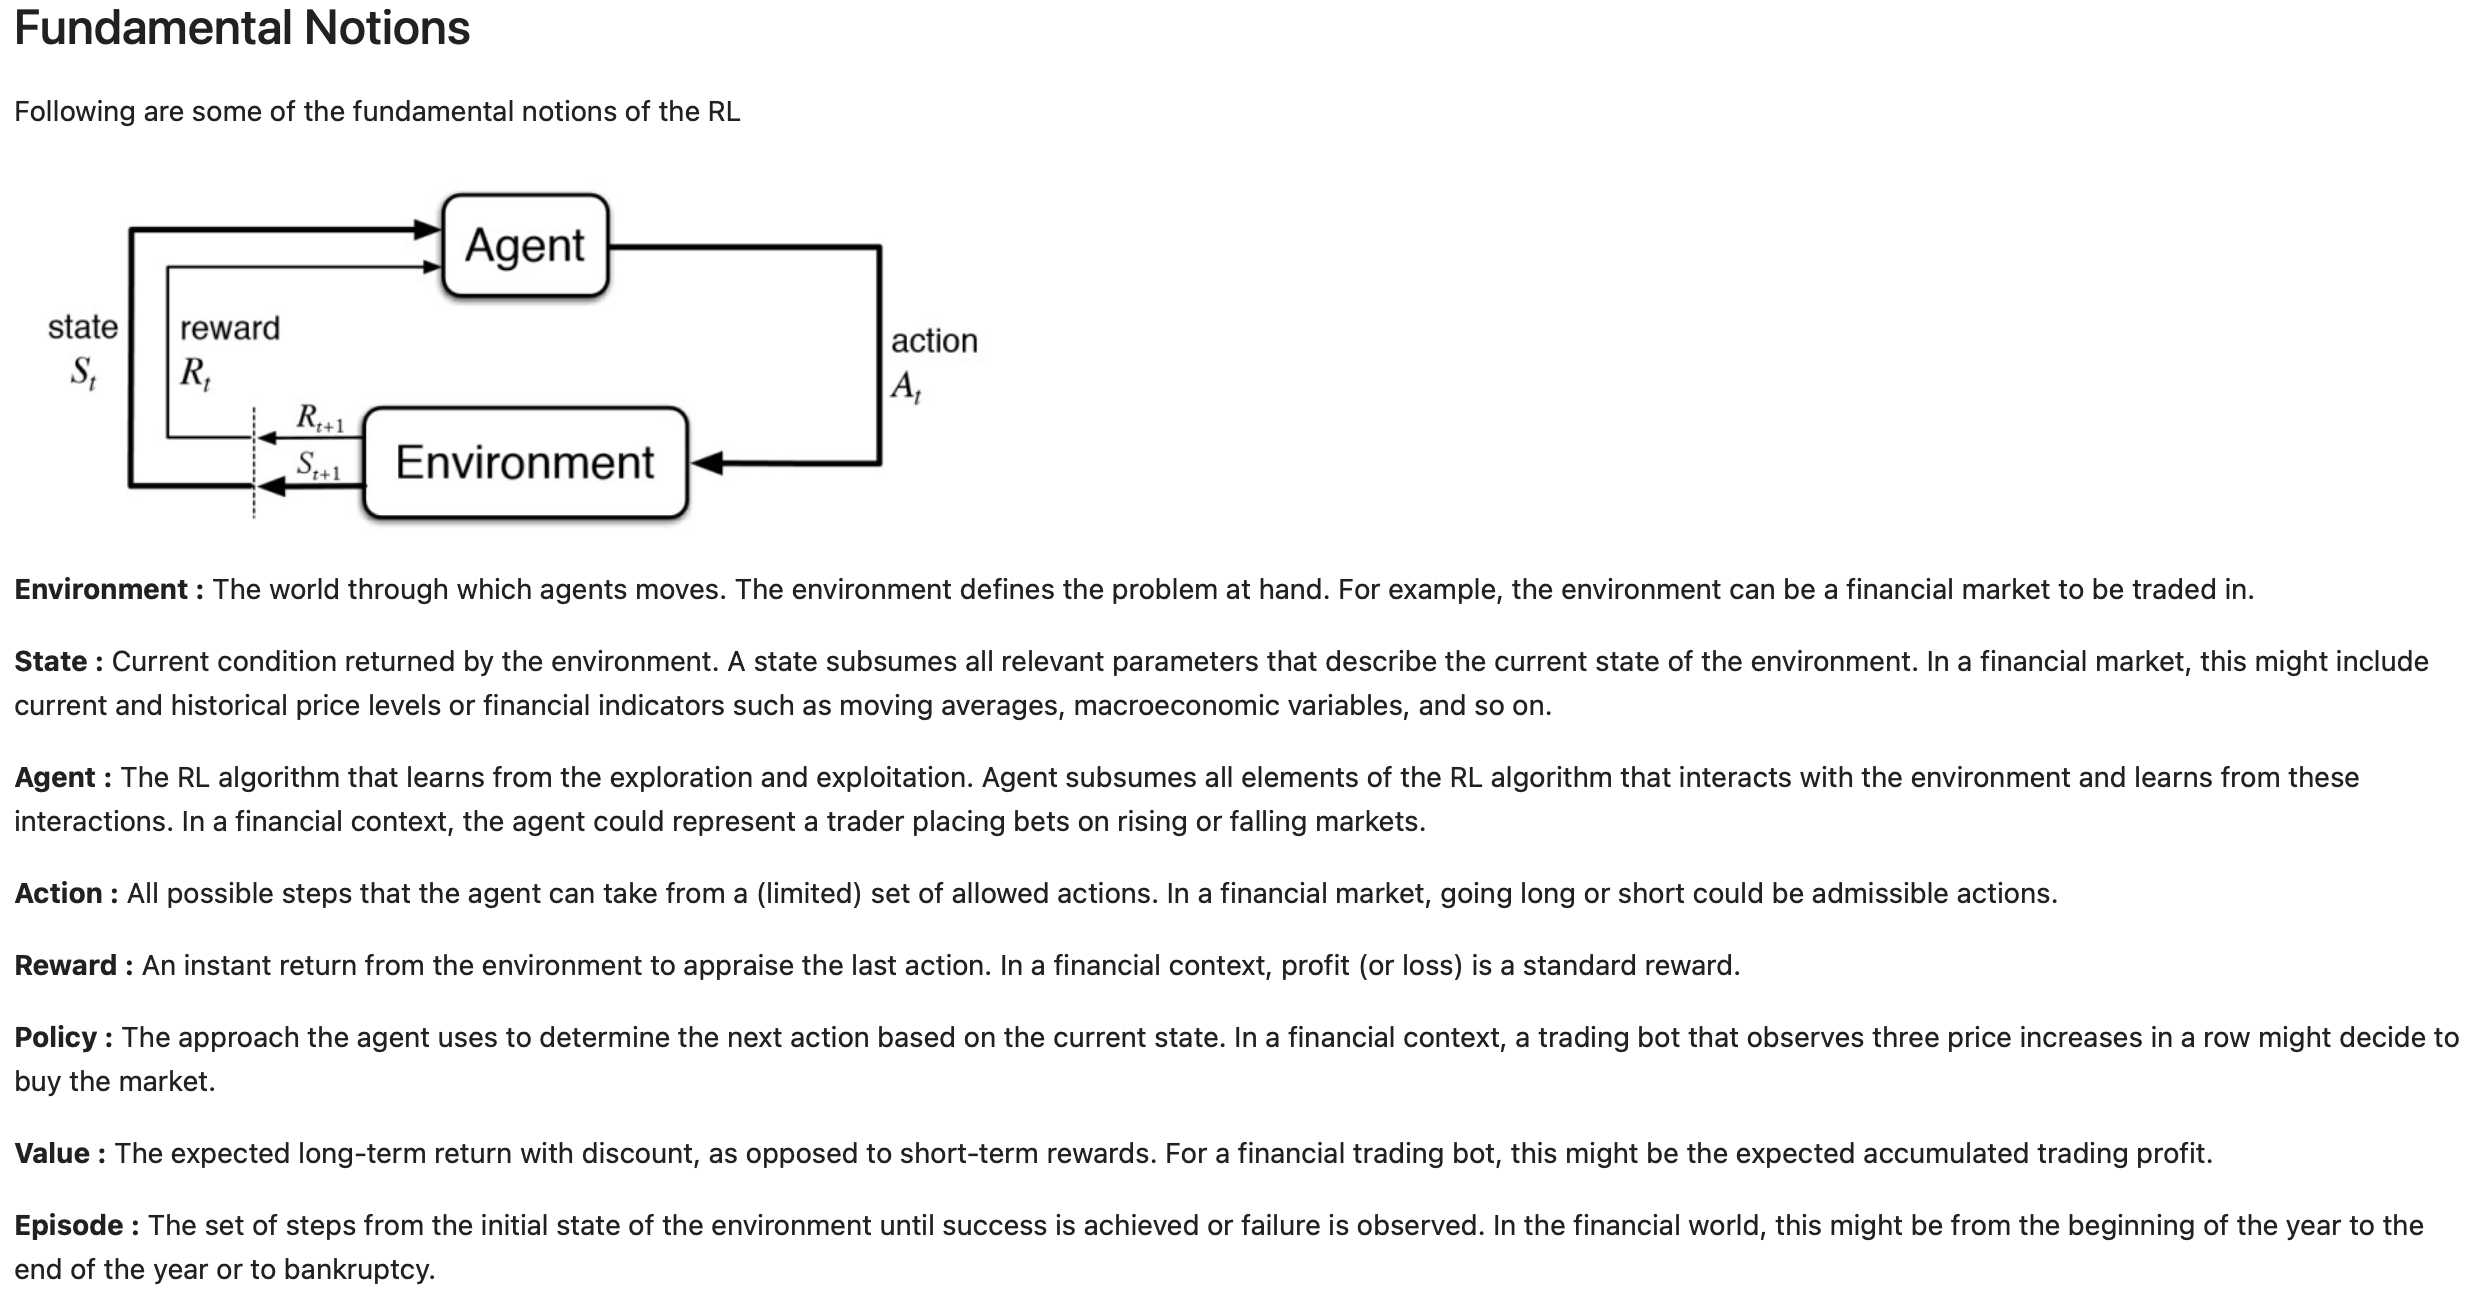

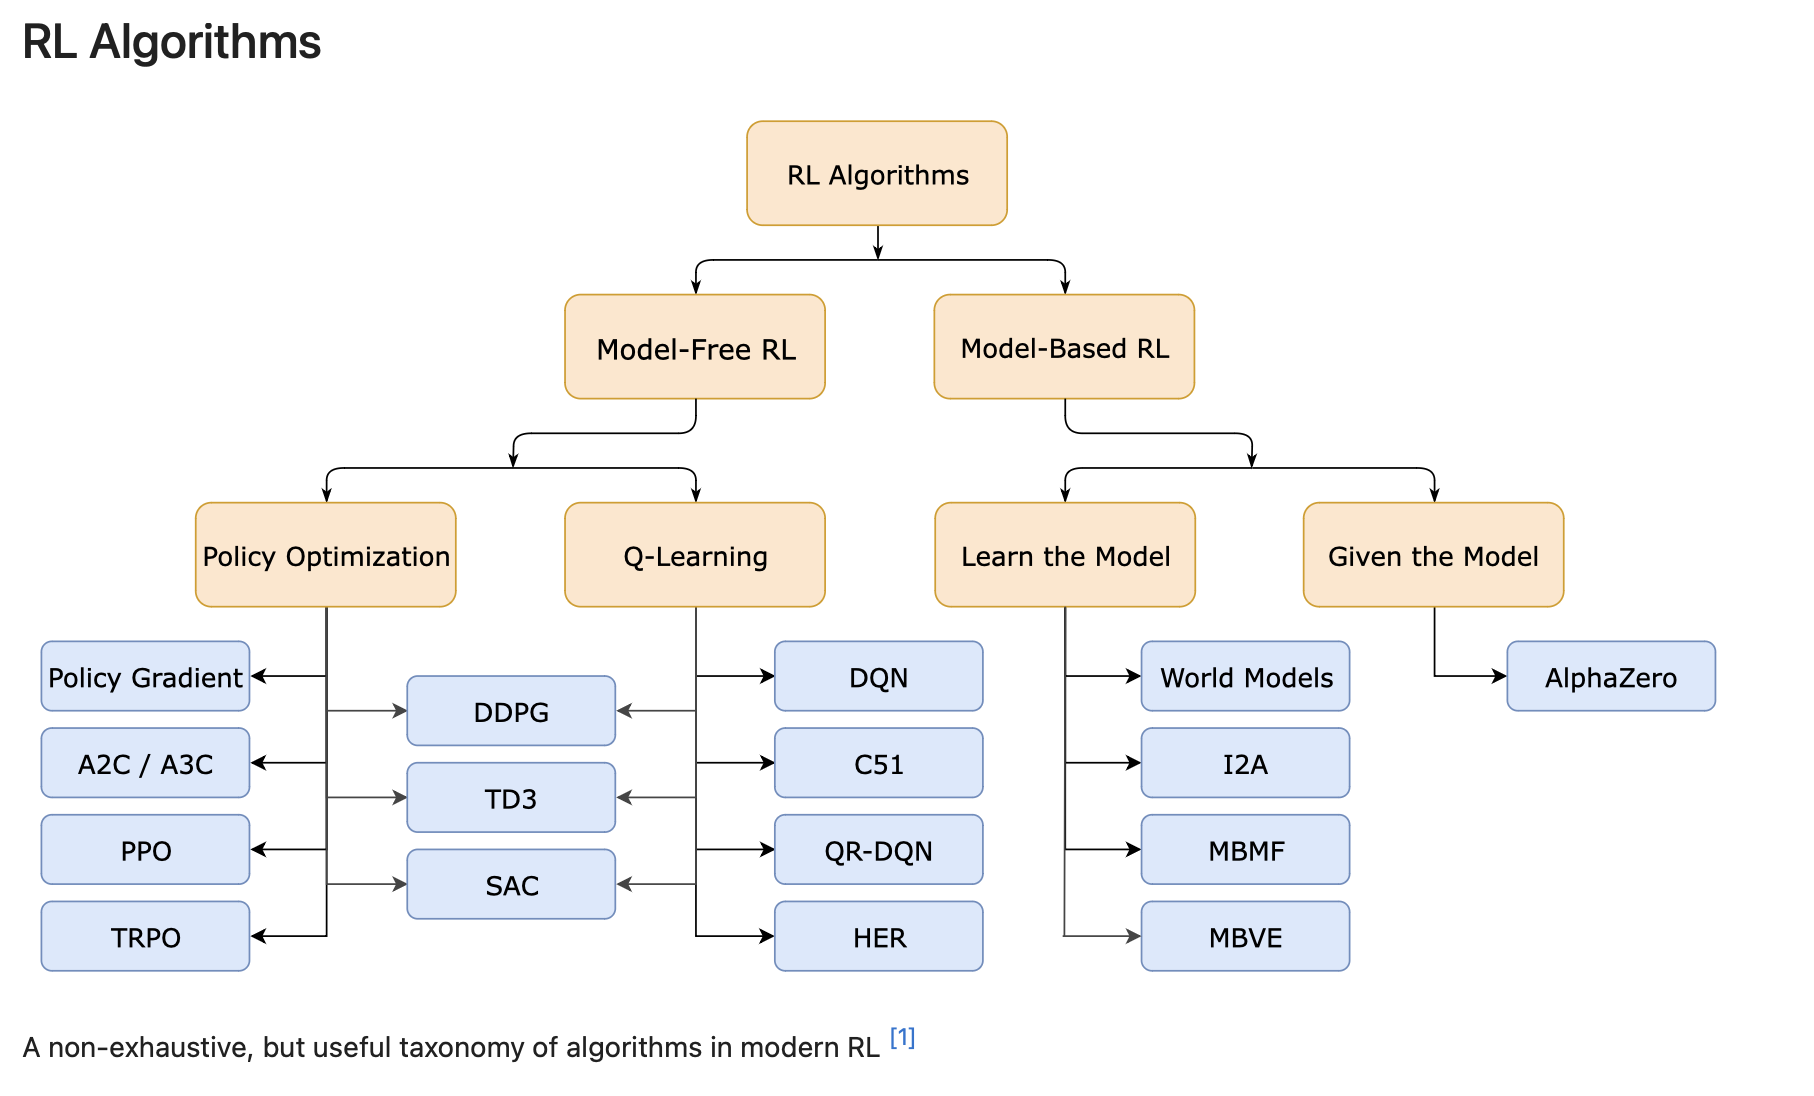

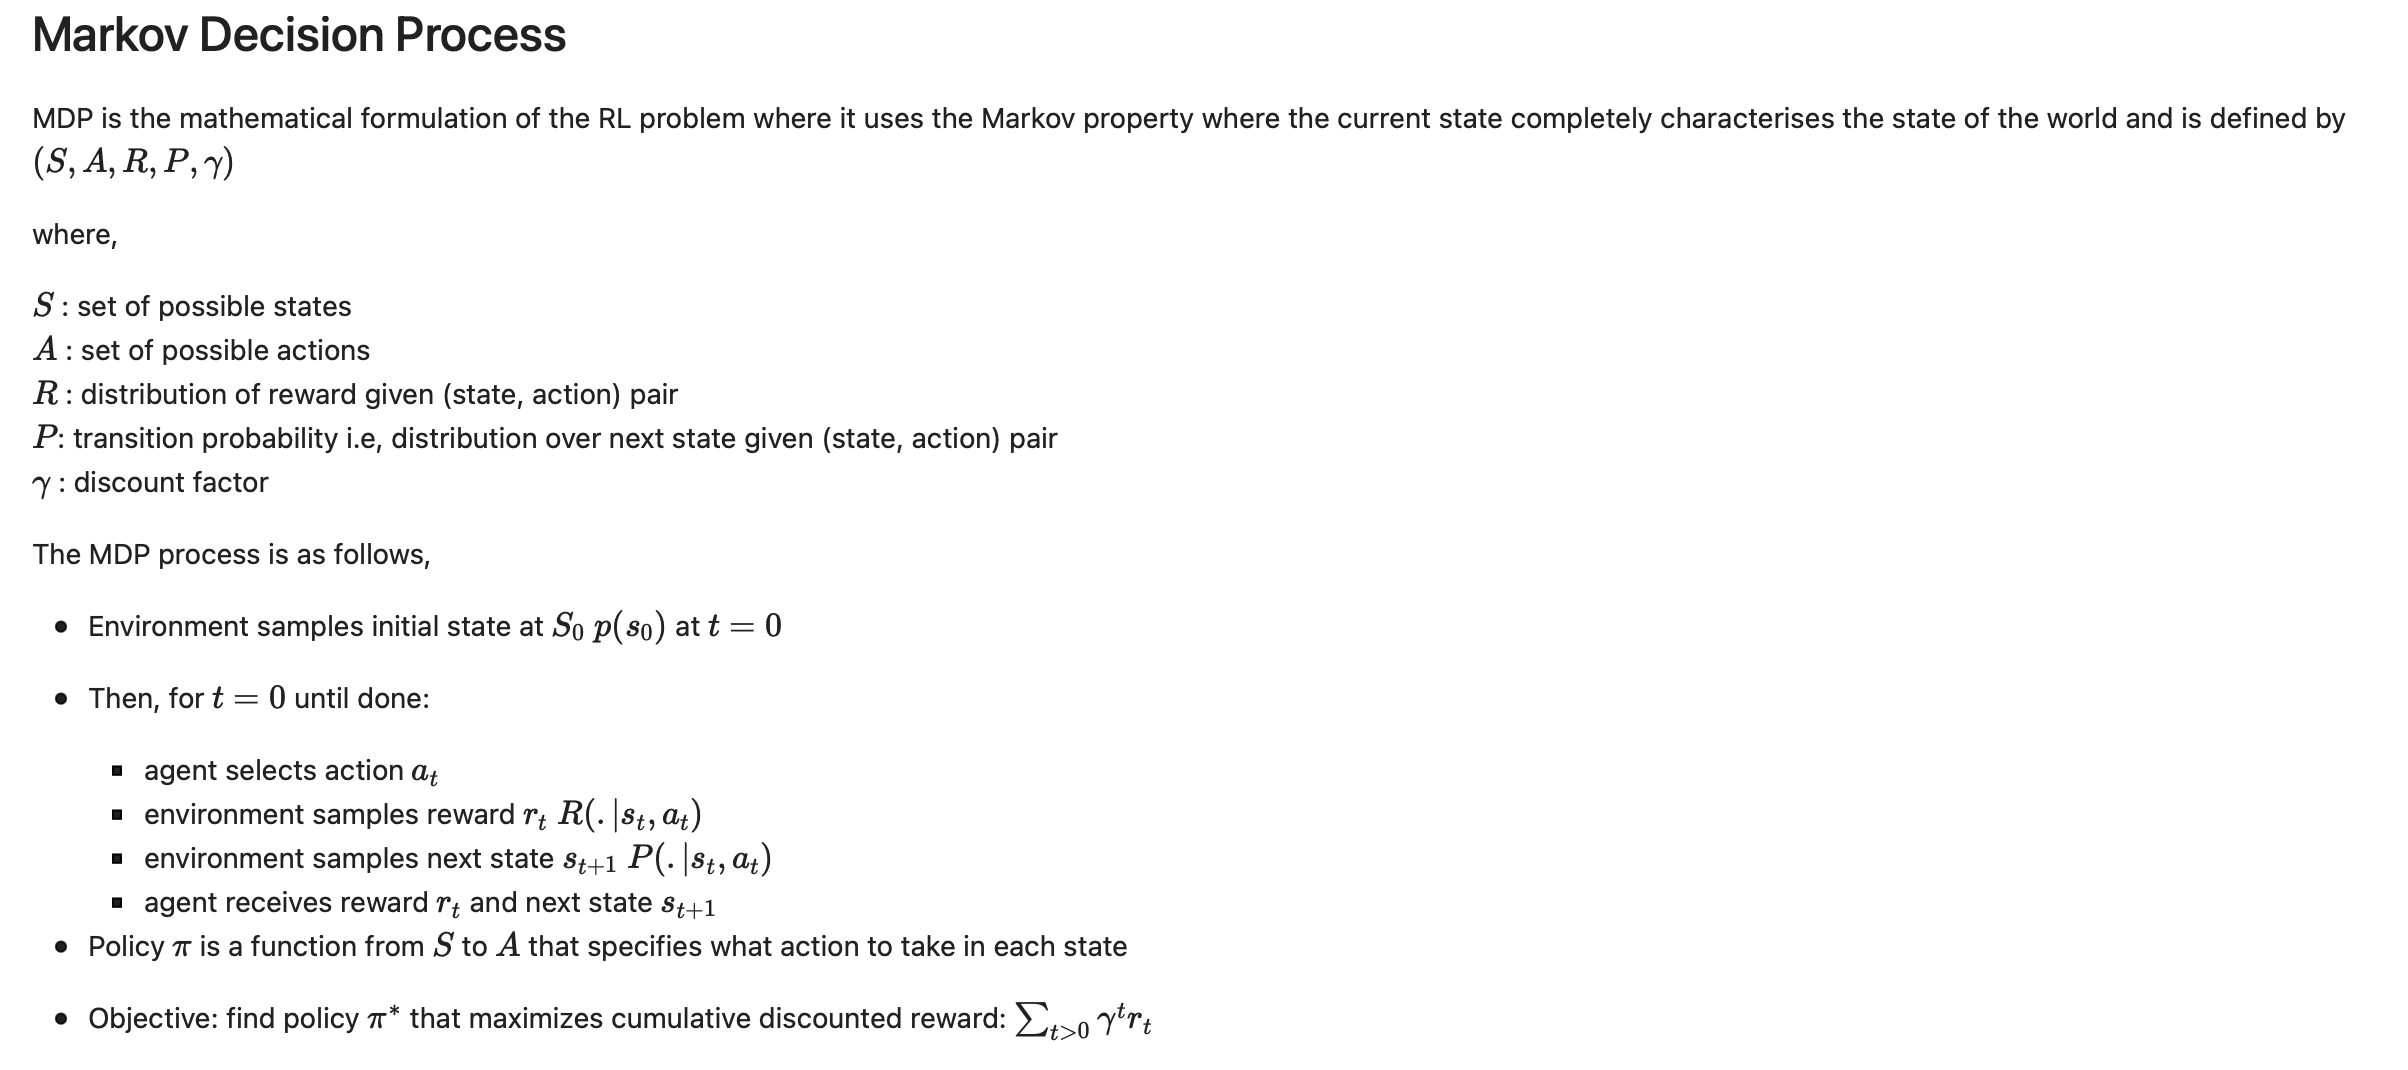

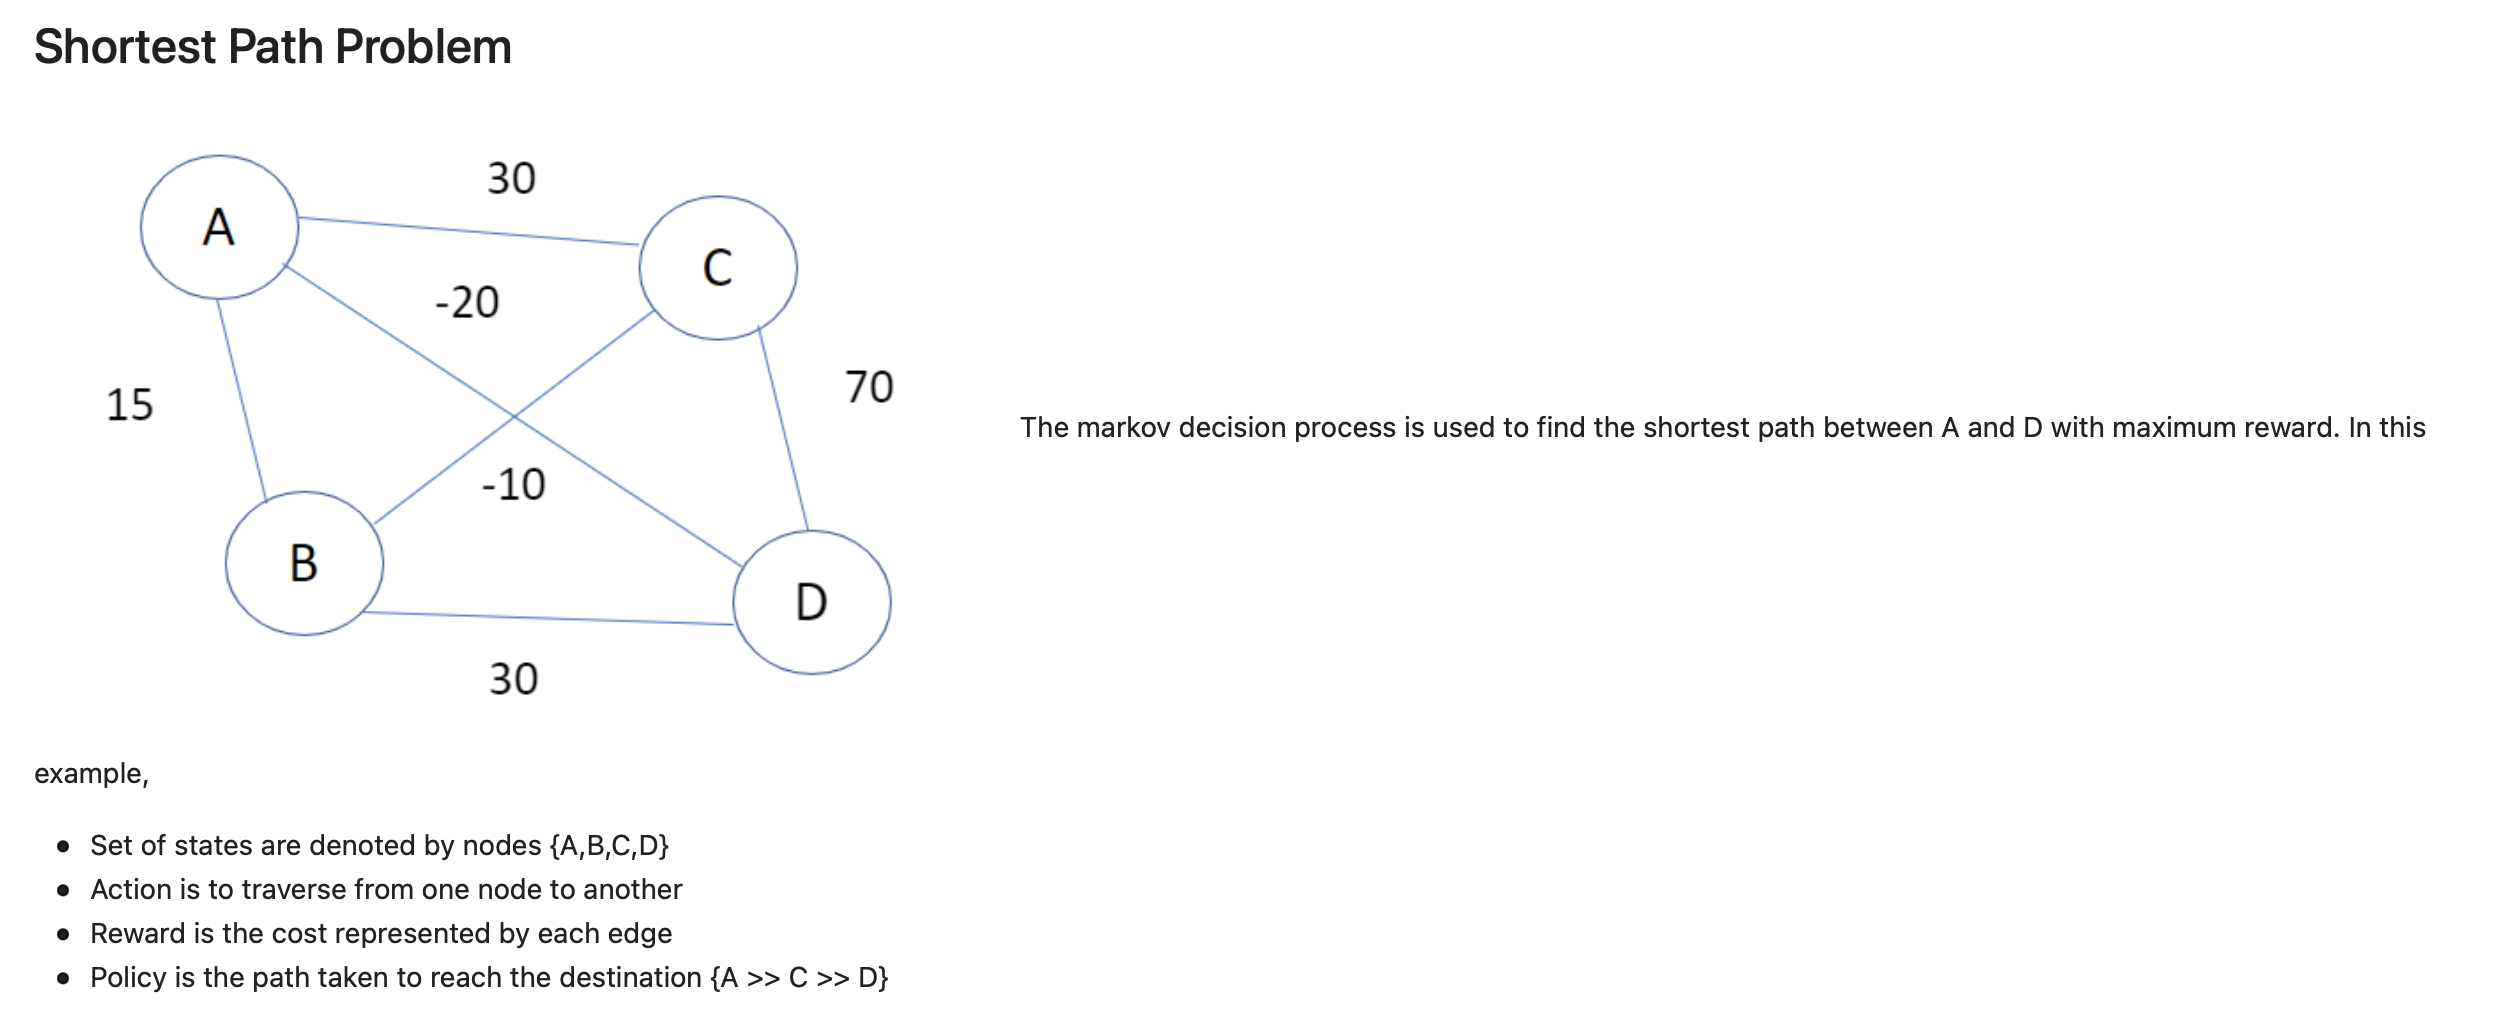

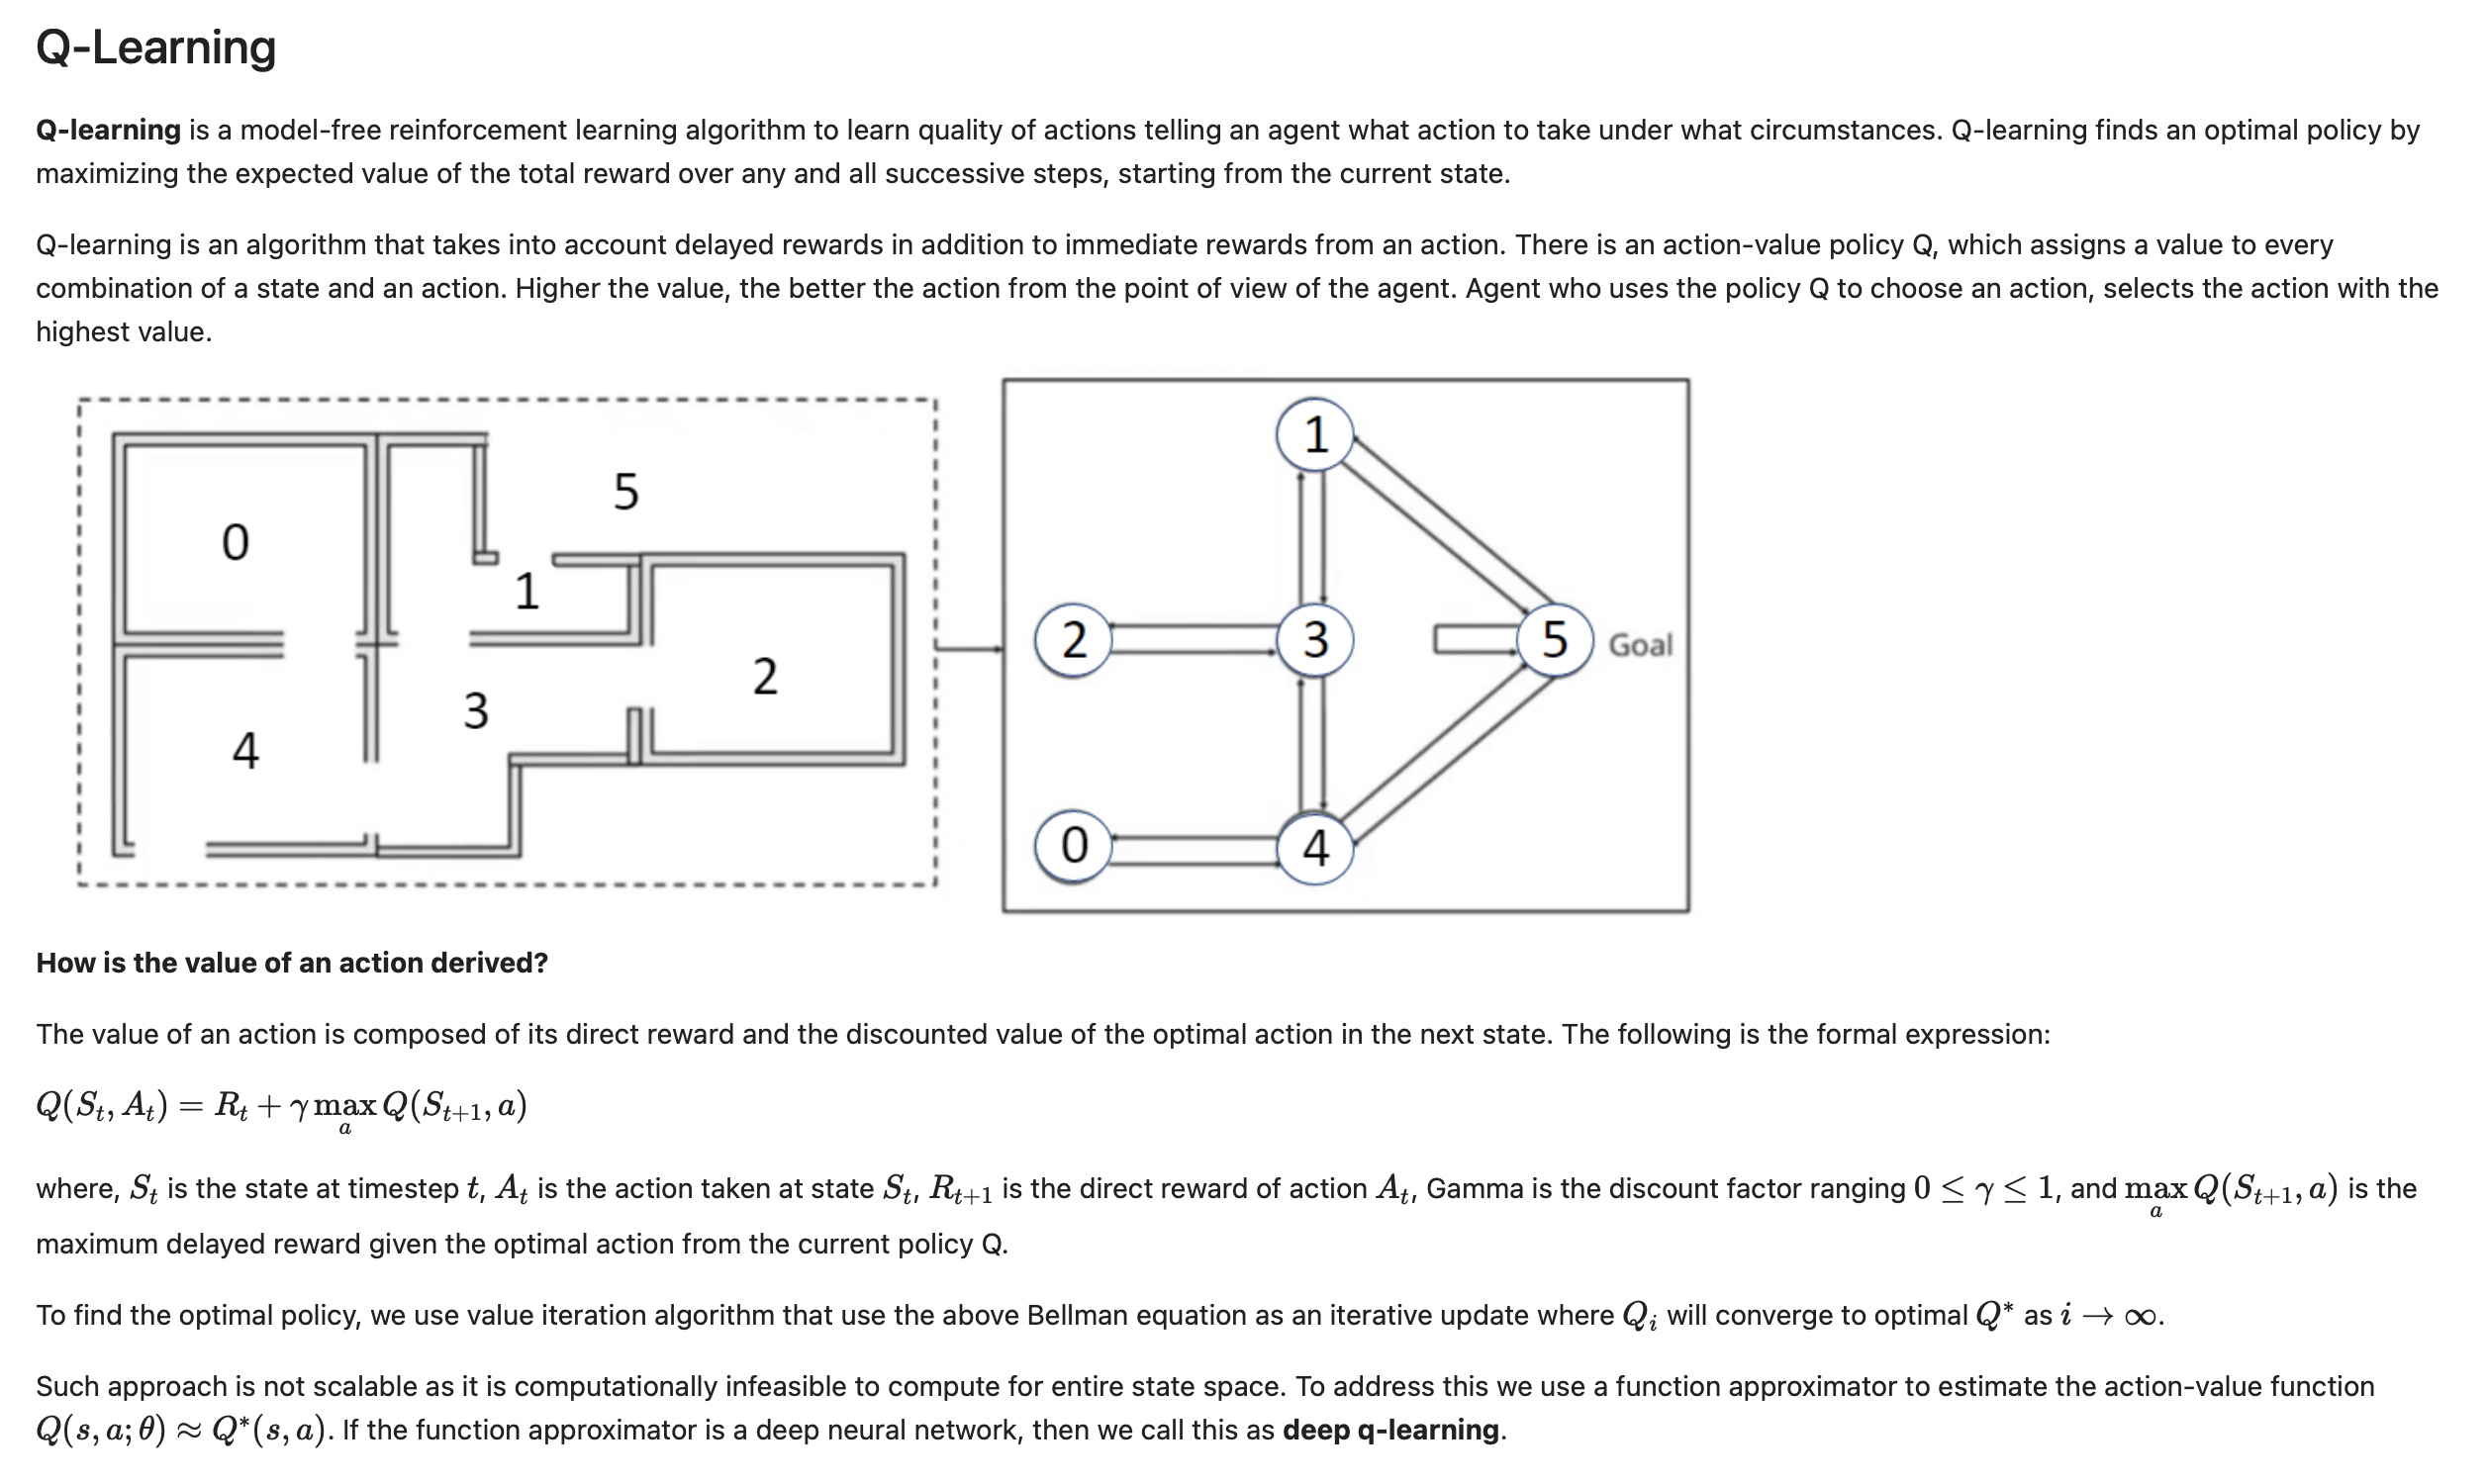

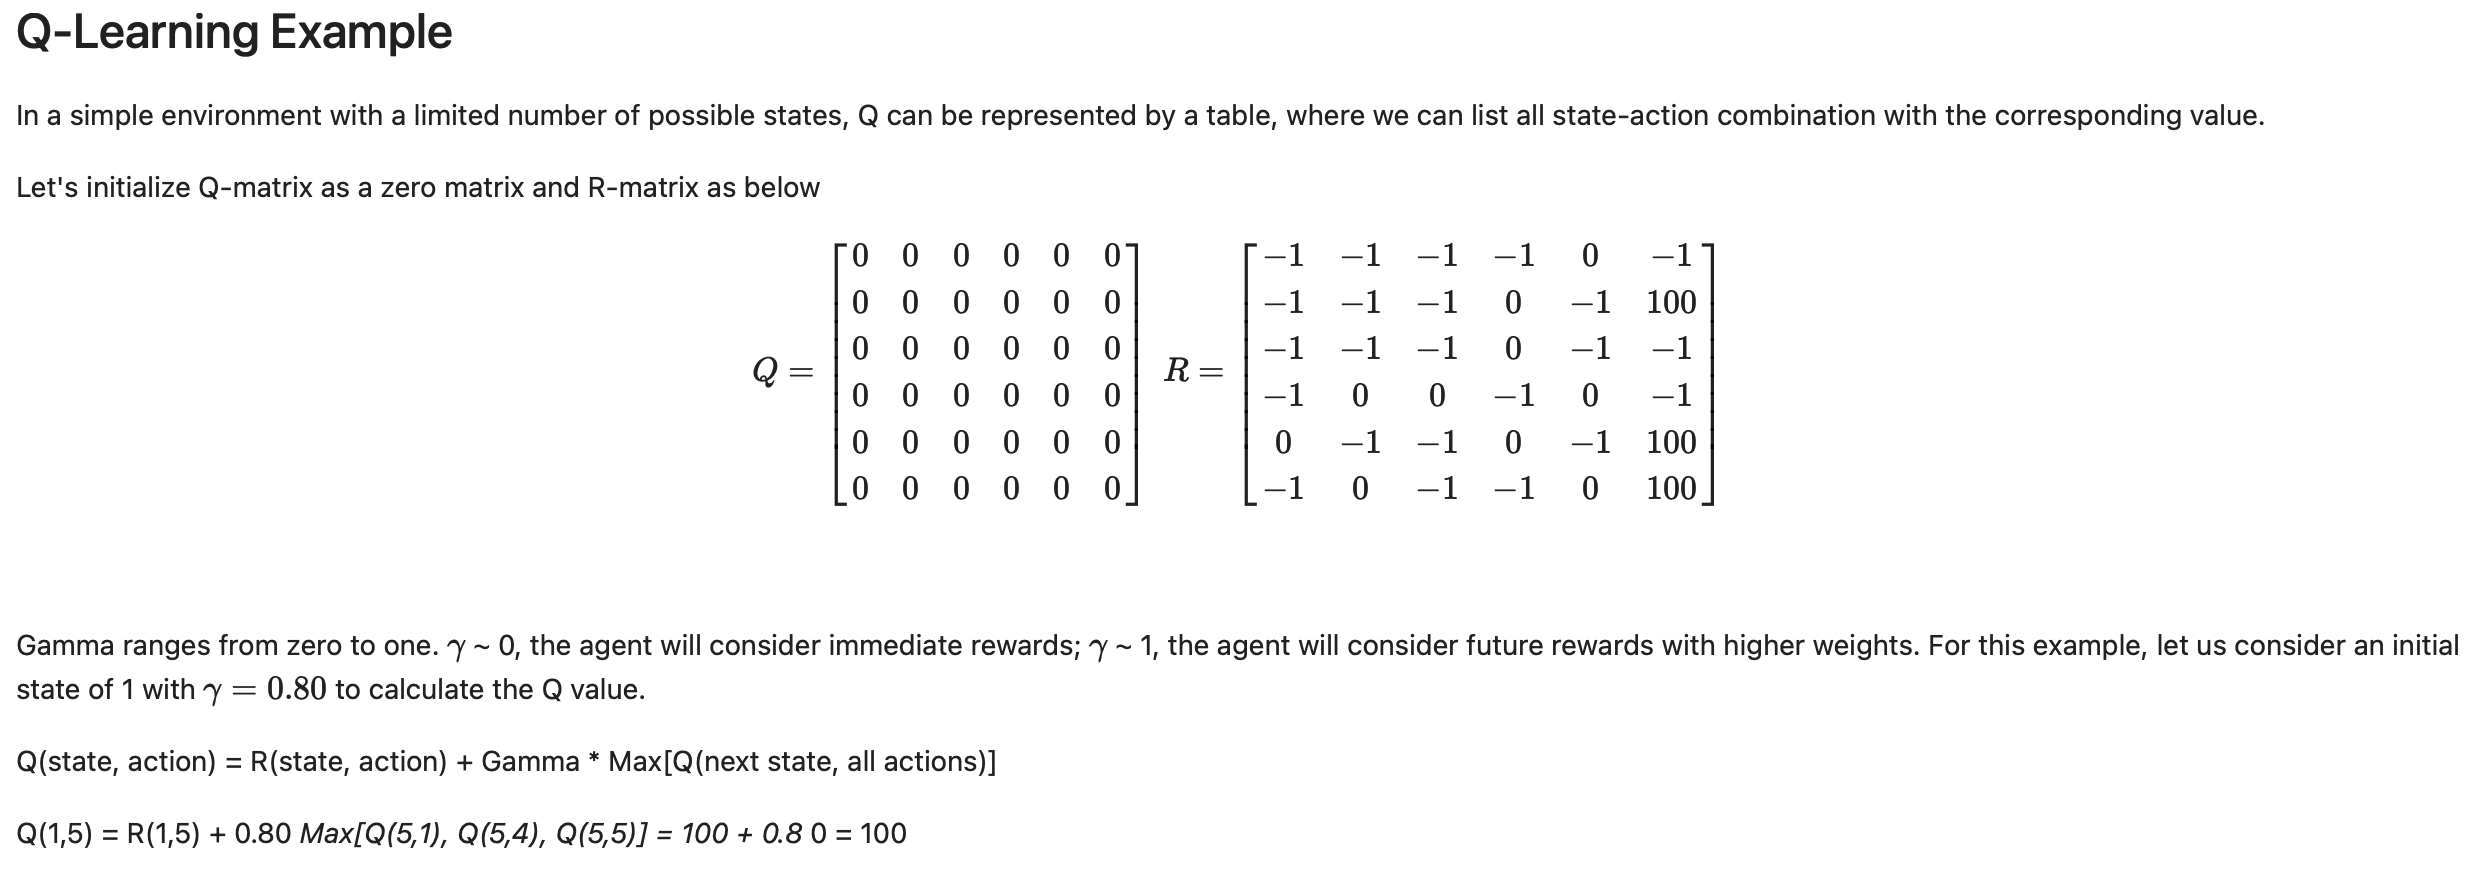

In [2]:
# from tensorflow.python.compiler.mlcompute import mlcompute
# mlcompute.set_mlc_device(device_name="gpu")

import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
# R matrix
R = np.array([[-1,-1,-1,-1,0,-1],
             [-1,-1,-1,0,-1,100],
             [-1,-1,-1,0,-1,-1],
             [-1,0,0,-1,0,-1],
             [-1,0,0,-1,-1,100],
             [-1,0,-1,-1,0,100]])

print(f'Reward Matrix \n \n {R}')

Reward Matrix 
 
 [[ -1  -1  -1  -1   0  -1]
 [ -1  -1  -1   0  -1 100]
 [ -1  -1  -1   0  -1  -1]
 [ -1   0   0  -1   0  -1]
 [ -1   0   0  -1  -1 100]
 [ -1   0  -1  -1   0 100]]


In [4]:
# Q Matrix
Q = np.array(np.zeros([6,6]))
print(f'Q Matrix \n \n {Q}')

Q Matrix 
 
 [[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


Let's now return all available actions in the state given as an argument

In [5]:
# Initial State - choosen at random
initial_state = 1

# Gamma (discount paramaters)
gamma = 0.8

In [6]:
# Let's now return all available actions in the state given as an argument
def available_actions(state):
    current_state_row = R[state]
    aaction = np.where(current_state_row >=0)[0]
    return aaction

# Get available actions in the current state
available_act = available_actions(initial_state)
available_act

array([3, 5])

Let's choose which action to be performed (at random) within the range of all available actions

In [7]:
# Next action to be performed
def next_action(available_action_range):
    naction = int(np.random.choice(available_act,1))
    return naction

# Action to be performed
action = next_action(available_act)
action

5

Let's now update the Q Matrix according to the path selected and the Q learning algorithm

In [8]:
# Update Q Matrix
def update(current_state, action, gamma):
    max_index = np.where(Q[action,] == np.max(Q[action,]))[0]
    
    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index,size=1))
    else:
        max_index = int(max_index)
    
    max_value = Q[action, max_index]
    
    # Q learning formula
    Q[current_state, action] = R[current_state, action] + gamma * max_value
    
# Update Q-matrix
update(initial_state, action, gamma)

In [9]:
# Training for 10000 iterations

for i in range(10000):
    current_state = np.random.randint(0,int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = next_action(available_act)
    update(current_state, action, gamma)
    
# Normalize the Q matrix
print(f'Trained Q-Matrix \n \n {Q/np.max(Q)*100}')

Trained Q-Matrix 
 
 [[  0.    0.    0.    0.   80.    0. ]
 [  0.    0.    0.   64.    0.  100. ]
 [  0.    0.    0.   64.    0.    0. ]
 [  0.   80.   51.2   0.   80.    0. ]
 [  0.   80.   51.2   0.    0.  100. ]
 [  0.   80.    0.    0.   80.  100. ]]


In [10]:
# testing
current_state = 2
steps = [current_state]

while current_state !=5:
    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[0]
    
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index,size=1))
    else:
        next_step_index = int(next_step_index)
        
    steps.append(next_step_index)
    current_state = next_step_index

In [11]:
# Print selected sequence of steps
print(f'Selected Path {steps}')

Selected Path [2, 3, 4, 5]


# OpenAI Gym

OpenAI is an organization that facilitate research in RL. OpenAI has developed and open sourced a suite of environments, called OpenAI Gym, that allows the training of RL agents via a standardized API.

The gym library addressed two important gaps that were slowing down the RL research.

* Need for better benchmarks
* Lack of standardization of environments used in publications

Gym is a toolkit for developing and comparing RL algorithms and makes no assumptions about the structure of the agent. It is compatible with any numerical computation library, such as TensorFlow or Theano. The gym library is a collection of environments that we can use to work out the RL algorithms. These environments have a shared interface, allowing us to write general algorithms.

In [13]:
!pip install gym -q

Environments

Here’s an example of cart-pole environment which will run an instance of the CartPole-v0 environment for 1000 timesteps, rendering the environment at each step.

In [17]:
import gym
env = gym.make('CartPole-v0')
env.reset()
for _ in range(1000):
    env.render()
    env.step(env.action_space.sample()) # take a random action
env.close()

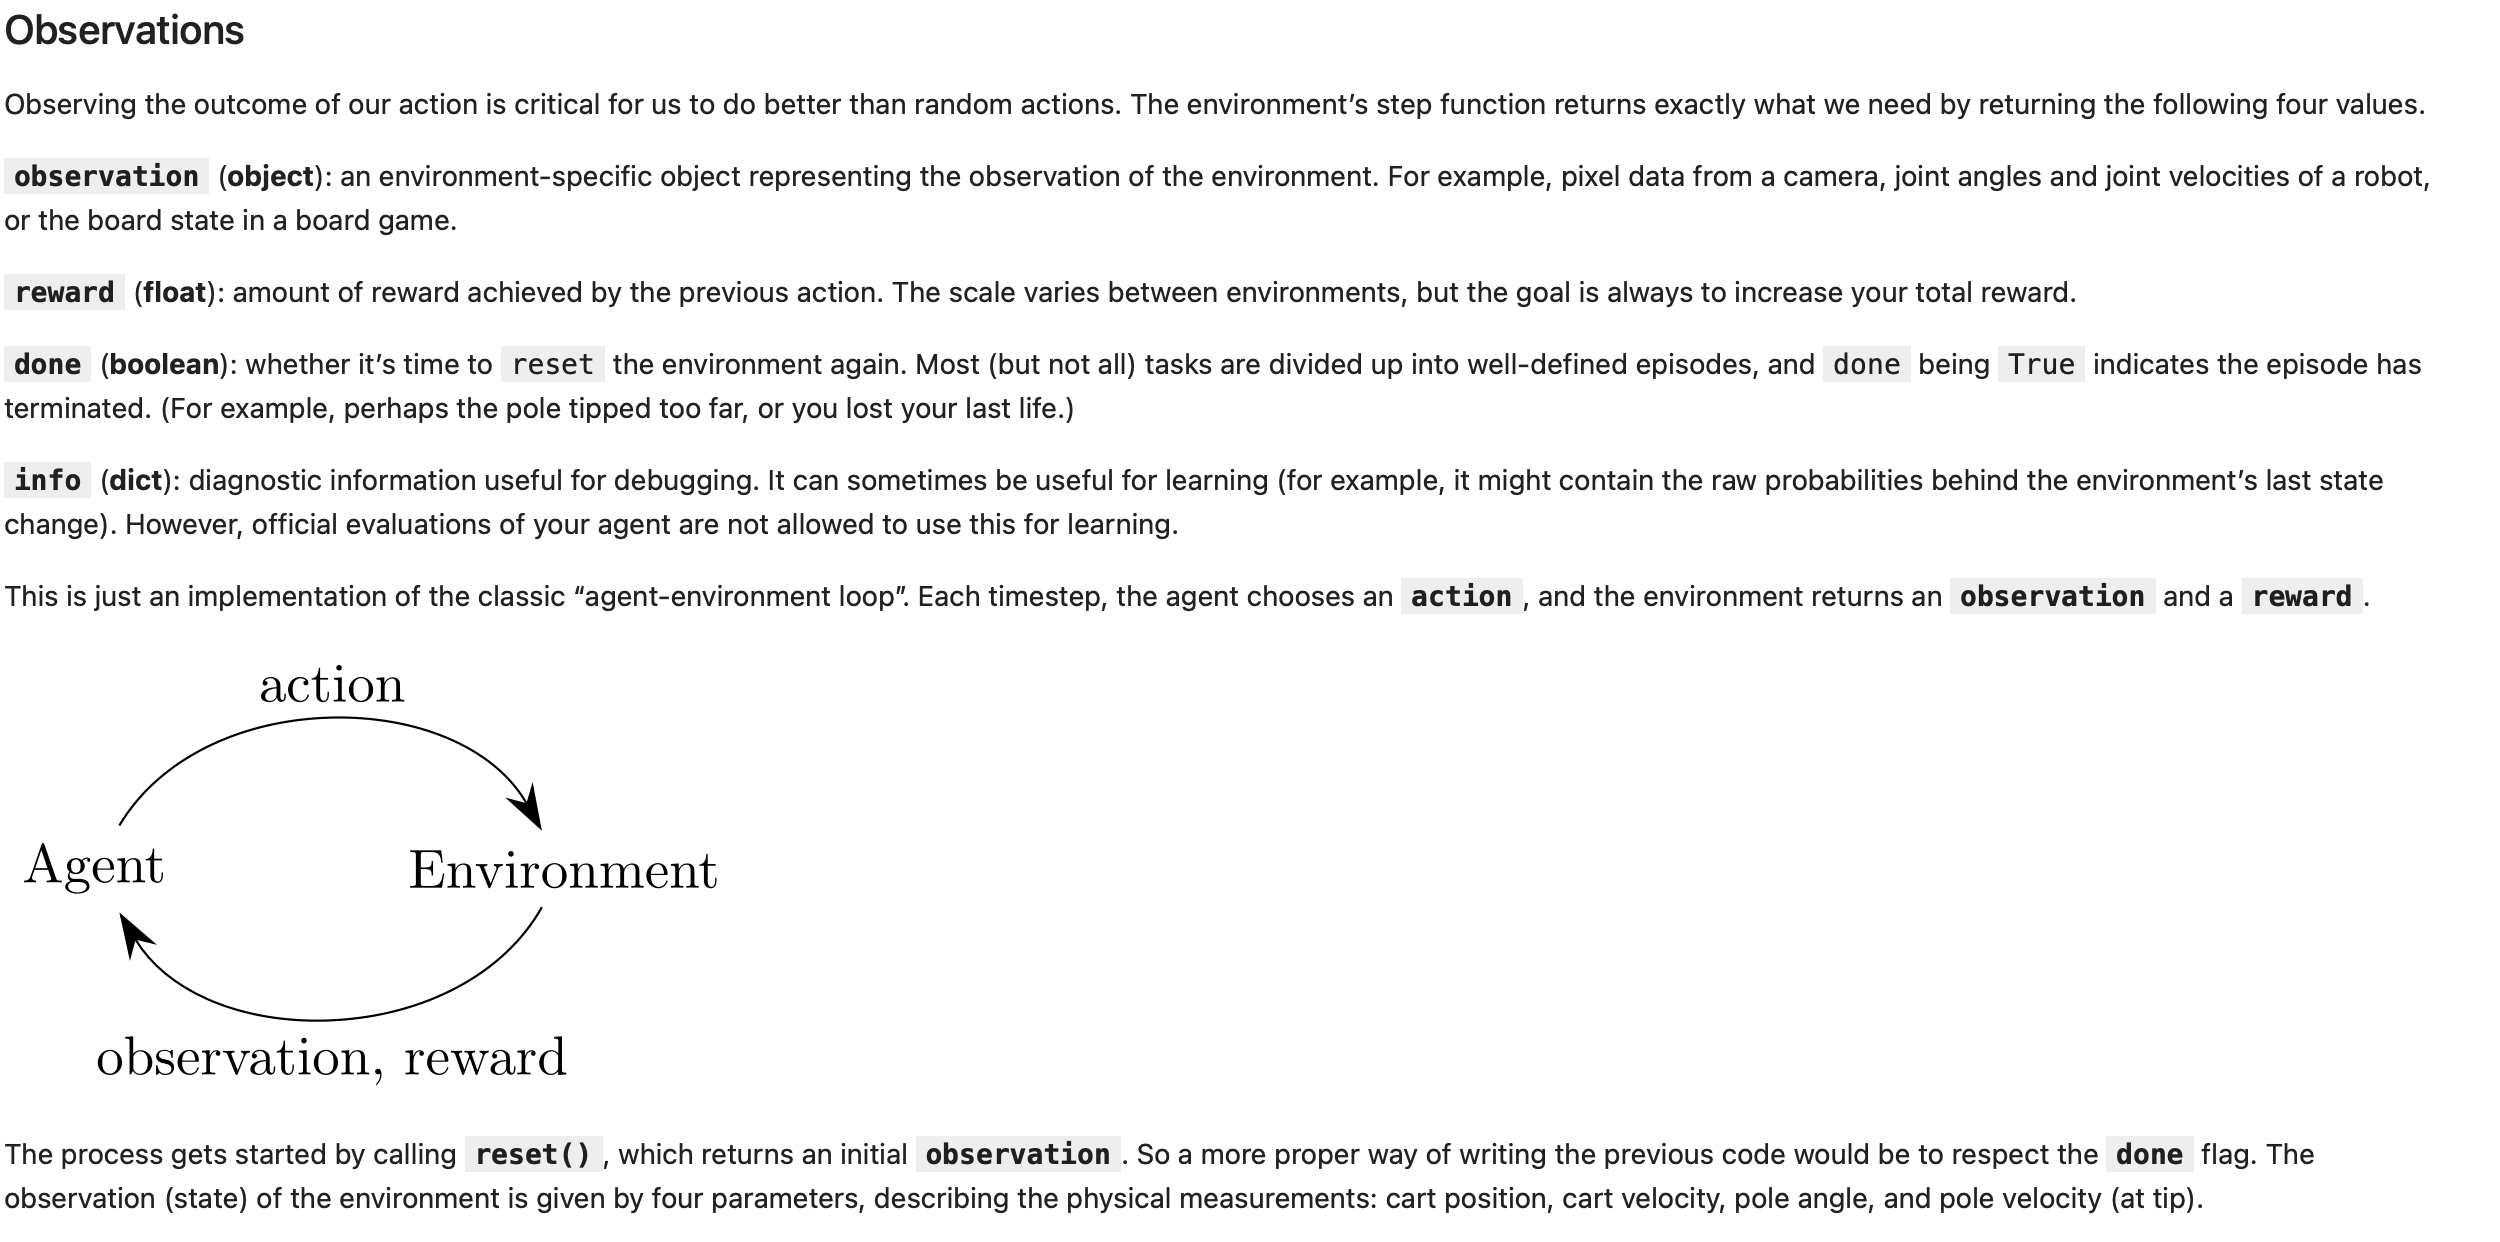

In [22]:
import gym
env = gym.make('CartPole-v0')
for i_episode in range(20):
    observation = env.reset()
    for t in range(100):
        env.render()
        print(observation)
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)[0]
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break
env.close()

(array([ 0.0462174 , -0.01585832, -0.029161  ,  0.0228499 ], dtype=float32), {})
Episode finished after 1 timesteps
(array([ 0.04392718, -0.00993068, -0.03975233,  0.00243092], dtype=float32), {})
Episode finished after 1 timesteps
(array([-8.1457816e-05, -3.4063771e-02, -4.5689396e-03, -2.3671504e-02],
      dtype=float32), {})
Episode finished after 1 timesteps
(array([-0.00258438, -0.0328669 , -0.00665718,  0.02922278], dtype=float32), {})
Episode finished after 1 timesteps
(array([-0.01035139,  0.0427495 ,  0.02093621,  0.0346146 ], dtype=float32), {})
Episode finished after 1 timesteps
(array([ 0.03120392,  0.03003678, -0.03507856, -0.01879222], dtype=float32), {})
Episode finished after 1 timesteps
(array([ 0.02858507, -0.01868847,  0.01103404, -0.00966465], dtype=float32), {})
Episode finished after 1 timesteps
(array([-0.04773729, -0.01453586,  0.01534432, -0.03459964], dtype=float32), {})
Episode finished after 1 timesteps
(array([-0.00661356,  0.0391416 ,  0.03234464, -0.0148

Spaces

In the above examples, we’ve been sampling random actions from the environment’s action space. But what actually are those actions? Every environment comes with an action_space and an observation_space. These attributes are of type Space, and they describe the format of valid actions and observations.

In [23]:
# action space
env.action_space

Discrete(2)

In [24]:
# state or observation space
env.observation_space

Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)

# state or observation space
env.observation_space

The Discrete space allows a fixed range of non-negative numbers, so in this case valid actions are either 0 or 1. The Box space represents an n-dimensional box, so valid observations will be an array of 4 numbers.

In [25]:
# check box bounds
print(f'High: {env.observation_space.high}')
print(f'Low: {env.observation_space.low}')

High: [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]
Low: [-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]


Learning Objective

A simple agent is one that follows a completely random policy as below.

In [30]:
env.reset()
for e in range(1, 200):
    a = env.action_space.sample()                                              # random action policy
    state, reward, done, info = env.step(a)[0]                                    # stepping forward one step 
    print(f'step={e:2d} | state={state} | action={a} | reward={reward}')
    if done and (e + 1) < 200:                                                 # failure if less than 200 steps
        print('*** FAILED ***')
        break

step= 1 | state=-0.030263835564255714 | action=1 | reward=0.24128186702728271
*** FAILED ***
